# 1-5. データ可視化 - 1～3次元の図表化（棒グラフ、折線グラフ、積み上げ縦棒グラフ）


データと一口に言っても様々なデータが存在し，それをわかりやすく可視化するための手法もデータの中身によって選択する必要がある．
[メディア芸術データベースのデータ](https://github.com/mediaarts-db/dataset)を利用して，様々なデータの可視化を行なってみよう．


In [ ]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
!pip install japanize-matplotlib
import japanize_matplotlib

## 棒グラフ





### データセットの準備
以下では，[メディア芸術データベースのデータ](https://github.com/mediaarts-db/dataset)を利用し，出版社ごとの出版したマンガ雑誌の種類の累計，およびゲームプラットフォームごとの対応ソフトの種類の累計を可視化する．
上記のリンクから「マンガ雑誌」の「.json」ファイルと，「ゲームバリエーション」の「.json」ファイルをダウンロードした後，このノートブックにアップロードしよう．

### 出版社ごとの出版したマンガ雑誌の種類の累計

In [ ]:
json_open = open('/content/metadata_cm-col_cm105_00001.json', 'r')
json_load = json.load(json_open, strict=False)
df = pd.DataFrame(json_load["@graph"])

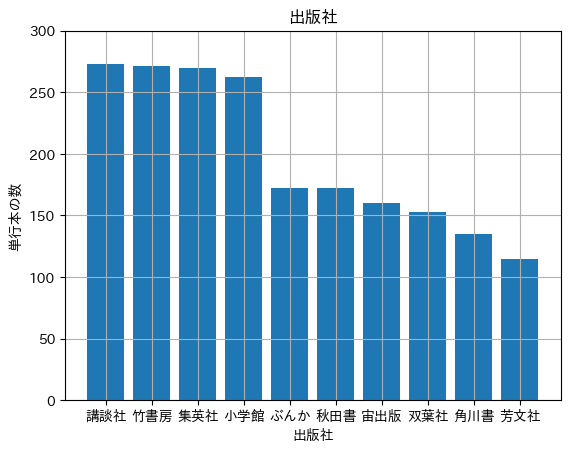

In [ ]:
#出版社を数える
count = df['publisher'].str.removeprefix('[発行]').str.removeprefix('[発売]').str[:3]
count=count.value_counts()
#グラフの関数
def show_graph(x, y):
    fig, ax = plt.subplots(dpi=100)
    ax.set_title('出版社')
    ax.set_xlabel('出版社')
    ax.set_ylabel('単行本の数')
    ax.set_ylim(0, 300)
    ax.grid()
    plt.bar(x,y)

#グラフの表示
show_graph(count.index[0:10],count[0:10])

### プラットフォームごとの販売されたゲームの種類数

In [ ]:
json_open = open('/content/metadata_gm-col_gm305_00001.json', 'r')
json_load = json.load(json_open, strict=False)
df = pd.DataFrame(json_load["@graph"])

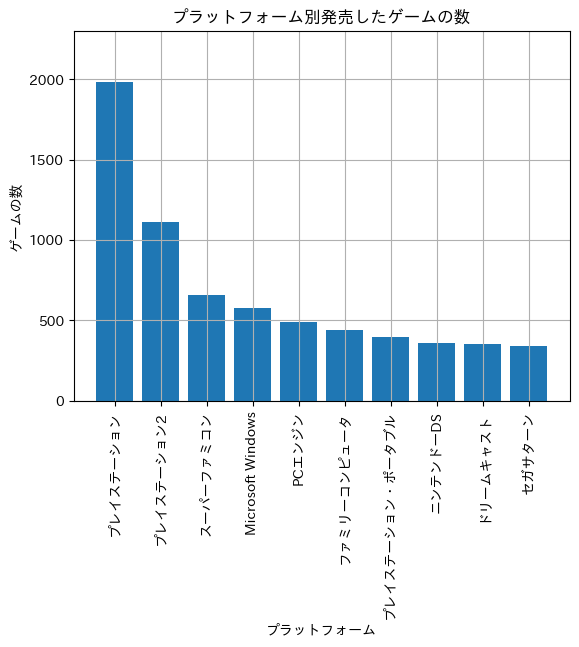

In [ ]:
plat_df = df[['gamePlatform',"datePublished",'source']]
#プラットフォームごとに数える
plat_count=plat_df["gamePlatform"].value_counts()
#グラフ表示関数
def show_graph(x, y):
    fig, ax = plt.subplots(dpi=100)
    ax.set_title('プラットフォーム別発売したゲームの数')
    ax.set_xlabel('プラットフォーム')
    ax.set_ylabel('ゲームの数')
    ax.set_ylim(0, 2300)
    ax.grid()
    # X軸を90度回転させて縦並びにする
    plt.xticks(rotation=90)
    plt.bar(x,y)
#上位10個をプロット
show_graph(plat_count.index[0:10],plat_count[0:10])

## 折れ線グラフ

### データセットの準備
以下では，[メディア芸術データベースのデータ](https://github.com/mediaarts-db/dataset)を利用し，集英社が出版した漫画の種類数を時系列で可視化する．
上記のリンクから「マンガ単行本」の「.json」ファイルをダウンロードした後，このノートブックにアップロードしよう．

※「1-4. 単回帰分析」，「1-4. ロジスティック回帰分析」，「1-5. 1～3次元の図表化」,「1-5. 関係性の可視化（ネットワーク構造）」，「1-7. ソートアルゴリズム」，「1-7. 探索アルゴリズム」，「2-5. データ加工」，「3-3. 機械学習」は同じデータセットを利用するため，もし同じものを持っている場合は以下の取得作業は不要である．そちらをアップロードしよう．

ファイルサイズがとても大きいためアップロードには時間がかかる．ファイル名が反映されたことを確認するだけでなく，ファイルアップロード時の画面の下部にあるアップロードの進捗を示す円形のバーが全て進行するまで待ってから作業しよう．（およそ30分程度）

In [ ]:
json_open = open('/content/metadata_cm-item_cm101_00001.json', 'r')
json_load = json.load(json_open, strict=False)
df = pd.DataFrame(json_load["@graph"])


### 集英社が出版した年毎の漫画の種類数の推移

(20.0, 50.0)

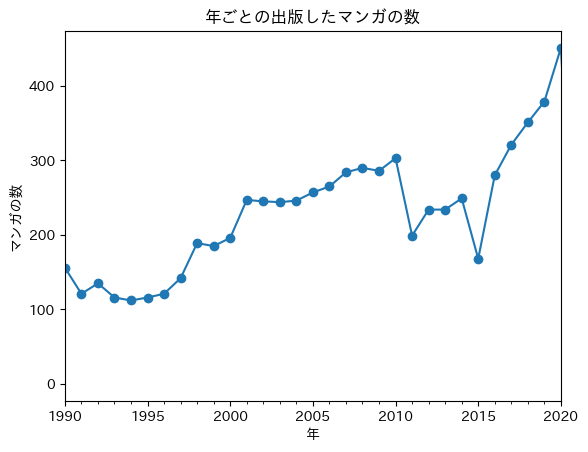

In [ ]:
#データ前処理
df = df[['publisher',"datePublished"]]
df['publisher']=df['publisher'].str[:3]
df.loc[df["datePublished"].str.len()<10,'datePublished']=df["datePublished"].astype(str)+'-01'
after_df=pd.DataFrame(df.loc[df["publisher"]=='集英社'])#時間のデータに変換
after_df['datePublished']=pd.to_datetime(after_df['datePublished'])
#年ごとに集計
year_counts = after_df.resample('Y',on='datePublished').size()

#プロット
year_counts.plot(kind='line', marker='o')
# グラフの設定
plt.title('年ごとの出版したマンガの数')
plt.xlabel('年')
plt.ylabel('マンガの数')
#プロット範囲
plt.xlim(pd.to_datetime("1990-01-01"),pd.to_datetime("2020-01-01"))

## 積み上げ棒グラフ

「棒グラフ」の節で扱ったデータを用いて，今度は「プラットフォーム別の発売したゲーム種類数」の時系列データを可視化する．なお，ここで可視化するデータは[RCGS](https://www.rcgs.jp/)にて所蔵が確認されているデータのみになっているため，存在する全てのゲームパッケージデータついてのグラフではないことに注意が必要である．

### 「プラットフォーム別の発売したゲーム種類数」の推移

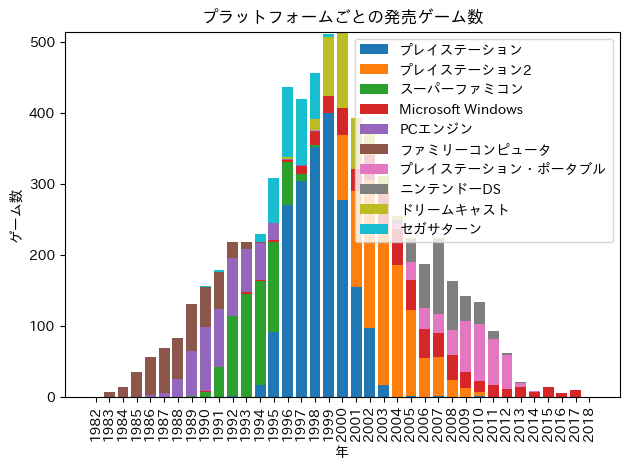

In [ ]:
df = plat_df.explode('gamePlatform')
yearly_counts = df.groupby(['gamePlatform', 'datePublished']).size().unstack()

# 積み上げ棒グラフのプロット
fig, ax = plt.subplots()
years = yearly_counts.columns
#積み上げるごとの中間地点
bottom = None
for platform in plat_count.index[0:10]:
    counts = yearly_counts.loc[platform].fillna(0)
    plt.xticks(rotation=90)
    #積み上げる
    ax.bar(years, counts, bottom=bottom, label=platform)
    if bottom is None:
        bottom = counts
    else:
        bottom += counts

# グラフの設定
ax.set_title('プラットフォームごとの発売ゲーム数')
ax.set_xlabel('年')
ax.set_ylabel('ゲーム数')
ax.legend()

# グラフの表示
plt.tight_layout()
plt.show()